# Precision, Recall, F-measure, Support

- **Precision** = tp / (tp + fp)
- **Recall** = tp / (tp + fn)
- **F1** = 2 * (precision * recall) / (precision + recall)
- **Support** = Number of cases on each class

Precision, Recall and therefore F-measure depend on the probability threshold utilized to determine the class output.

---

## Libraries

In [11]:
import numpy as np
import pandas as pd
import warnings 

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import(
    precision_score,
    recall_score,
    f1_score,
    precision_recall_fscore_support
)

from yellowbrick.classifier import(
    ClassificationReport,
    DiscriminationThreshold
)

warnings.filterwarnings("ignore")

---

## Load Data

In [2]:
# Load dataset
data = pd.read_csv("../kdd2004.csv")

# Remap target class to 0 & 1
data["target"] = data["target"].map({-1:0, 1:1})

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,0
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,0
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,0
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,0
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,0


In [3]:
# Dataset size

data.shape

(145751, 75)

In [4]:
# Target variable imblance

data["target"].value_counts(normalize= True)

target
0    0.991108
1    0.008892
Name: proportion, dtype: float64

### Train Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels = ["target"], axis = 1),
    data["target"],
    test_size = 0.3,
    random_state = 0
)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

#### Baseline Model: Predict the majority class

In [8]:
y_train_base = pd.Series(np.zeros(len(y_train)))
y_test_base = pd.Series(np.zeros(len(y_test)))

<blockquote>This is the baseline model that always predicts the majority class.</blockquote>

### Train ML Models

#### Random Forests

In [10]:
rf = RandomForestClassifier(
    n_estimators= 100,
    random_state= 42,
    max_depth= 2,
    n_jobs = 4
)

rf.fit(X_train, y_train)

y_train_rf = rf.predict_proba(X_train)[:, 1]
y_test_rf = rf.predict_proba(X_test)[:, 1]

#### Logistic Regression

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

logit = LogisticRegression(
    random_state= 42, 
    max_iter= 2000
)

logit.fit(X_train_scaled, y_train)

y_train_logit = logit.predict_proba(X_train_scaled)[:, 1]
y_test_logit = logit.predict_proba(X_test_scaled)[:, 1]


#### Precision

In [14]:
print("Precision Baseline Test: ", precision_score(y_test, y_test_base))
print("Precision Random Forest Test: ", precision_score(y_test, rf.predict(X_test)))
print("Precision Logistic Regression Test: ", precision_score(y_test, logit.predict(X_test_scaled)))

Precision Baseline Test:  0.0
Precision Random Forest Test:  0.995850622406639
Precision Logistic Regression Test:  0.9453376205787781


<blockquote>
Scikit-learn determines that an observation belongs ot the positive class if the probability is larger than 0.5.


<br>The Precision is an indicator of false positives.

Large values of Precision indicate fewer false positive values returned by the model.</blockquote>

<blockquote>The Random Forest model has lower false positive rate compared to the Logistic Regression model.

#### Recall

In [17]:
baseline_recall = recall_score(
    y_test, 
    y_test_base, 
    pos_label= 1
    )

rf_recall = recall_score(
    y_test,
    rf.predict(X_test),
    pos_label= 1
    )

logit_recall = recall_score(
    y_test,
    logit.predict(X_test_scaled),
    pos_label= 1
)


print(f"Recall Baseline test: {baseline_recall}" )
print(f"Recall Random Forest Test: {rf_recall}")
print(f"Recall Logistic Regression Rest: {logit_recall}")

Recall Baseline test: 0.0
Recall Random Forest Test: 0.5925925925925926
Recall Logistic Regression Rest: 0.725925925925926


<blockquote>The Recall measures how many observations from the minority class are correctly labeled by the model.</blockquote>

#### F-Measure or F1 Score

In [18]:
baseline_f1_score =  f1_score(
    y_test,
    y_test_base,    
)

rf_f1_score = f1_score(
    y_test,
    rf.predict(X_test),
    pos_label= 1
)

logit_f1_score = f1_score(
    y_test,
    logit.predict(X_test_scaled),
    pos_label = 1
)

print(f"F-measure Baseline Test: {baseline_f1_score}")
print(f"F-measure Random Forest Test: {rf_f1_score}")
print(f"F-measure Logistic Regression Test: {logit_f1_score}")

F-measure Baseline Test: 0.0
F-measure Random Forest Test: 0.7430340557275542
F-measure Logistic Regression Test: 0.8212290502793296


<blockquote>The Logistic Regression model performs better than the Random Forest model. 

<br> This is because the F-measure is the balance between the Precision and Recall. </blockquote>

#### All metrics in 1 function

##### Random Forest

In [21]:
precision, recall, fscore, support = precision_recall_fscore_support(
    y_test, 
    rf.predict(X_test),
    pos_label= 1
) 
print(f"Random Forest Precision: {precision}")
print(f"Random Forest Recall: {recall}")
print(f"Random Forest F-score: {fscore}")
print(f"Support: {support}")

Random Forest Precision: [0.99620559 0.99585062]
Random Forest Recall: [0.99997692 0.59259259]
Random Forest F-score: [0.99808769 0.74303406]
Support: [43321   405]


<blockquote>The first element in each list corresponds to the metrics for the majority class. 

<br>The second element in each list corresponds to the metrics for the minority class.


The values coincide with those that were obtained when the metrics were calculated individually.</blockquote>

### Full Classification Report

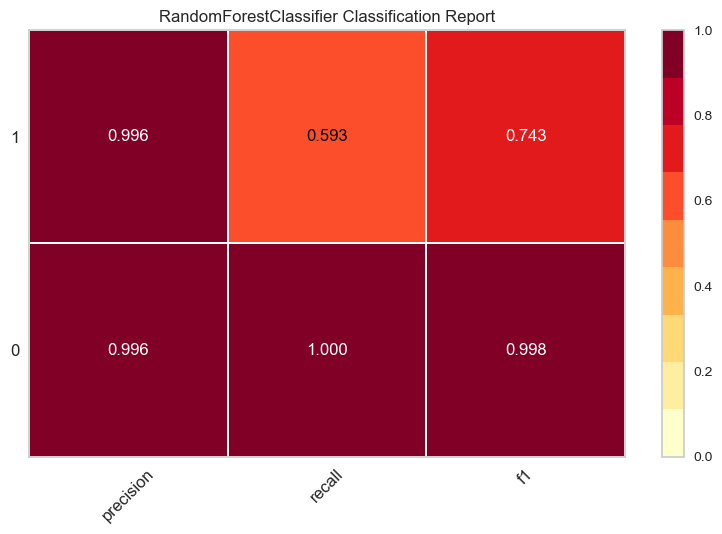

In [33]:
visualizer = ClassificationReport(rf)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

<blockquote>This report is particularly useful when there are more than 2 classes in the target variable.</blockquote>

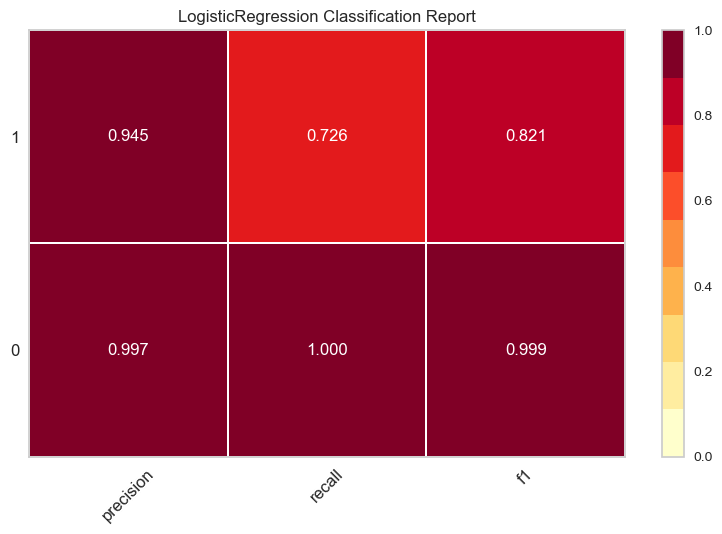

In [35]:
visualizer = ClassificationReport(logit)

visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show();

<blockquote>The Logistic Regression has a higher value of Recall and F1-Measure for the minority class.

<br>The Random Forest has better performance for the majority class. 

We are usually more interested in better classifying the minority class. 

Thus, we should select the Logistic Regression model over the Random Forest model.</blockquote>

#### Precision & Recall vs Probability Threshold

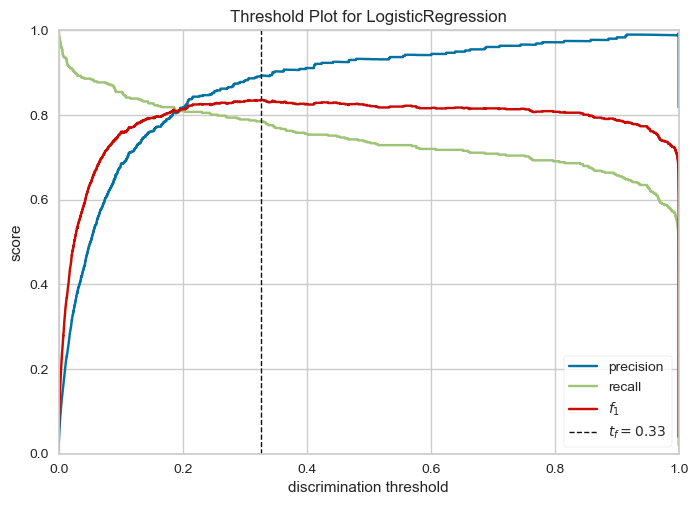

In [37]:
visualizer = DiscriminationThreshold(
    logit,
    n_trials= 1,
    cv = 0.5,
    argmax= "fscore",
    random_state = 42,
    is_fitted= "auto",
    exclude = "queue_rate"
)

visualizer.fit(X_train_scaled, y_train)
visualizer.score(X_test_scaled, y_test)
visualizer.show();

<blockquote>In order to acquire a better view of the metrics. The discrimination threshold would fit several models on the train and test sets.

<blockquote>The number of trials parameter is set to 1 in order to speed up the analysis. To get a better measure of the error, simply increase the number of trials.

<br>The argmax parameter indicates which metrics to optimize. 

It can also optimize the Precision or Recall.

The is is_fitted parameter allows the transformer to determine if the model that is passed into it is already fit.<blockquote>

<blockquote>The visualizer automatically determines the optimal threshold that maximizes the F1 score which is seen in the legend. 

<br>The dotted line indicates the optimal threshold.<blockquote>

---